In [ ]:
# Librerias

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# **Ejercicio 1**

Resuelva la Ecuación del calor, usando el método anterior para los siguientes casos

## **Caso A** 

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$. 

Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

**Usando odeint**

In [ ]:
def diffi(u,t):
  dudt=np.zeros(x0.shape) # Valor inicial de la barra igual a 0
# Condiciones a la frontera
  dudt[0]=10
  dudt[-1]=0
  kappa=100
  
# Calculamos la temperatura en los puntos interiores de 1 a N-1
  for i in range(1,N-2):
    dudt[i] = kappa*((u[i + 1] - 2*u[i] + u[i - 1] )/ (h**2) ) 
  return dudt

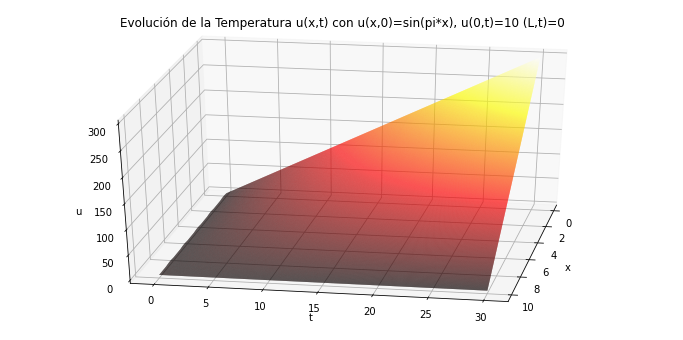

In [ ]:
# Longitud de la barra
a=0
b=10

# Tiempo inicial y final
t0=0.0
tf=30.0

# Número de puntos en X
N=400

# Tamaño del paso
h = (b-a)/(N-1)

# Puntos en el dominio X
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0


# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 800);

# Solución con odeint
sol = odeint(diffi, x0, tspan)

# Gráfica en 3D
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=10)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=10 (L,t)=0')
plt.show()

**Usando diferencias finitas**

dt/dx**2 < 0.5? 0.002


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'lw'


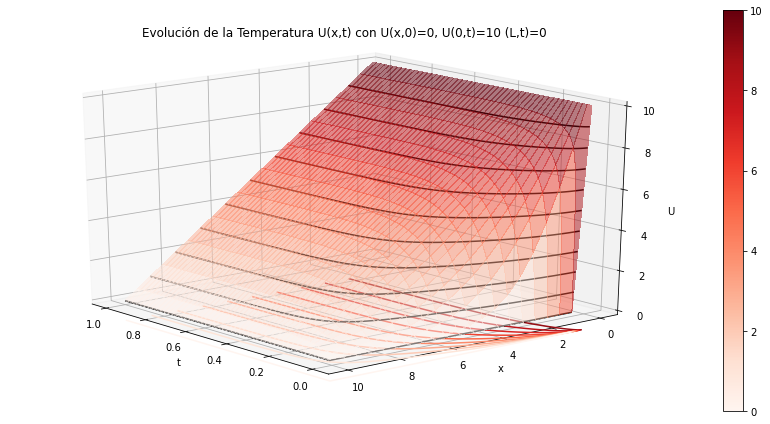

In [ ]:
M=21 # Pasos en x
N=2001 # Pasos en t

#Punto inicial y final de la barra
x0=0
xL=10 

#Tiempo de integracion
t0=0
tf=1.0

# Tamaños de diferenciación en x y t
dx= (xL - x0) / (M - 1) 
dt = (tf - t0) / (N - 1) 
print('dt/dx**2 < 0.5?', dt/dx**2)

# Coefeiciente de difusión térmica
kappa=100.0 

# Coeficiente de la ecuación
alpha=(kappa*dt)/(dx**2) 

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)

# Matriz solución con ceros
U = np.zeros((M, N))

# Condición inicial
U[:,0] = np.zeros(xspan.shape)

# Condiciones a la frontera
U[0, :] = 10
U[-1, :] = 0.0

# Avance en el tiempo y cálculo de temperaturas
for k in range(0, N-1): 
    for i in range(1, M-1): 
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Malla para graficar
T, X = np.meshgrid(tspan, xspan)

# Tamaño de la figura
fig = plt.figure(figsize=(12,6))

# Gráfica de la superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

# Grafica una tabla de valores 
m = plt.cm.ScalarMappable(cmap='Reds')

m.set_array(U)
plt.colorbar(m)

# Etiquetas
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=0, U(0,t)=10 (L,t)=0')

# POV
ax.view_init(elev=20, azim=140)

plt.tight_layout()
plt.show()

## **Caso B**

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

In [ ]:
def diffi_b(u,t):
  dudt=np.zeros(x0.shape)+20 # Valor inicial de la barra igual a 20
  
  # Condiciones a la frontera
  dudt[0]=20 + 10 *np.sin(np.pi*t/12)
  dudt[-1]=20
  kappa=0.25

  # Calculamos la temperatura en los puntos interiores de 1 a N-1
  for i in range(1,N-1):
    dudt[i] = kappa*((u[i + 1] - 2*u[i] + u[i - 1] )/ (h**2) )
  return dudt

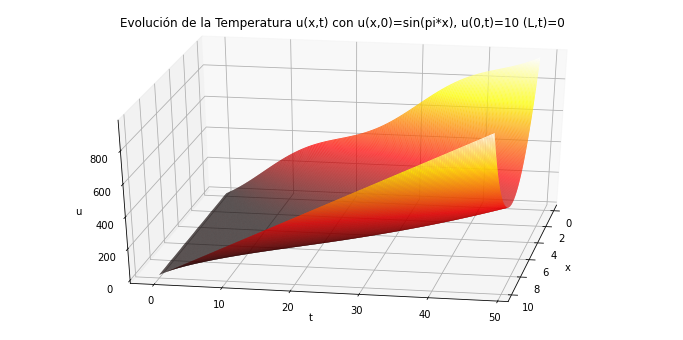

In [ ]:
# Longitud de la barra
a=0
b=10

# Tiempo inicial y final
t0=0.0
tf=48.0

# Número de puntos en X
N=400

# Tamaño del paso
h = (b-a)/(N-1)

# Puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 400);

# Solución usando odeint
sol = odeint(diffi_b, x0, tspan)

# Gráfica en 3D
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=30, azim=10)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=10 (L,t)=0')
plt.show()

**Usando diferencias finitas**

dt/dx**2 < 0.5? 0.096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: The following kwargs were not used by contour: 'lw'


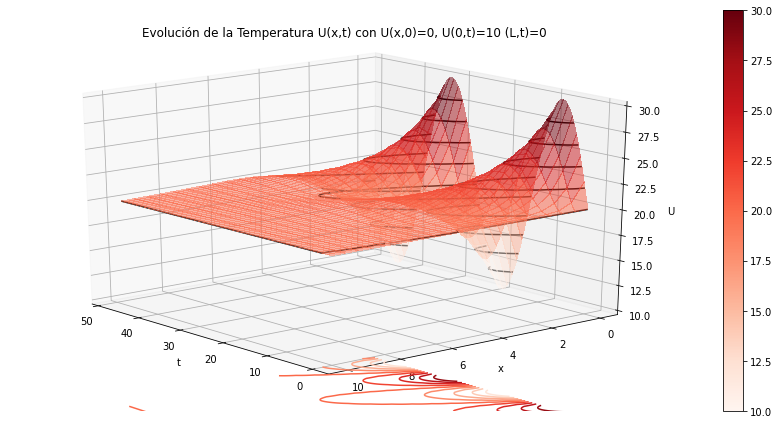

In [ ]:
# Pasos en x(M) y en t(N)
M=21 
N=2001 

# Punto inicial y final de la barra
x0=0
xL=10 

# Tiempo de integracion
t0=0
tf=48.00

# Tamaño de diferenciación en x y t
dx= (xL - x0) / (M - 1) 
dt = (tf - t0) / (N - 1) 
print('dt/dx**2 < 0.5?', dt/dx**2)

# Coeficiente de difusion termica
kappa=0.25 
# coeficiente de la ecuacion
alpha=(kappa*dt)/(dx**2) 

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)

# Matriz solución con ceros
U = np.zeros((M, N))

# Condición inicial
U[:,0] = np.zeros(xspan.shape)+20
# Condiciones a la frontera
U[0, :] =20 + 10*np.sin(np.pi*tspan/(12))
U[-1, :] = 20.0

# Avance en el tiempo y cálculo de temperaturas x
for k in range(0, N-1): 
    for i in range(1, M-1): 
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Malla para graficar
T, X = np.meshgrid(tspan, xspan)


fig = plt.figure(figsize=(12,6))
# Gráfica de la superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)


# Gráfica de la tabla de valores 
m = plt.cm.ScalarMappable(cmap='Reds')

m.set_array(U)
plt.colorbar(m)

# Etiquetas
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=0, U(0,t)=10 (L,t)=0')

# POV
ax.view_init(elev=20, azim=140)

plt.tight_layout()
plt.show()

# **Ejercicio 2**

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera.

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como

$$\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}$$

donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos.

Usando la Ecuación de Calor, determina numéricamente la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

Realiza una simulación de al menos 48 horas.

dt/dx**2 < 0.5? 46.08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: The following kwargs were not used by contour: 'lw'


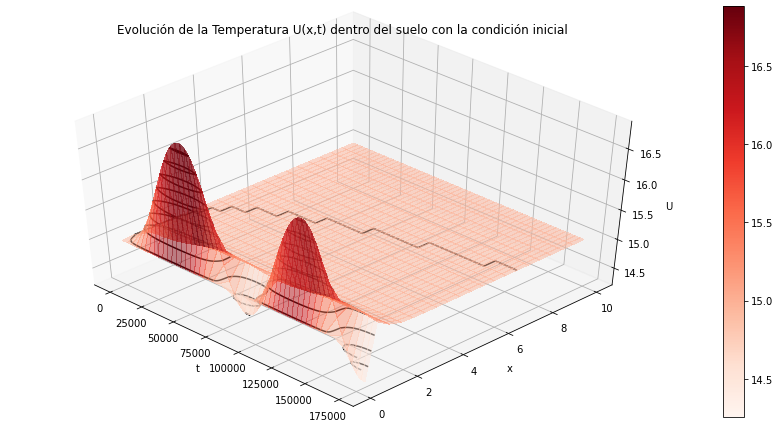

In [ ]:
# Número de puntos en el eje x y en t
M = 21 
N = 15001 

# Intervalo de profunidad
x0 = 0
xL = 10 # Profundidad donde t es constante

# Intervalo de tiempo
t0 = 0
tf = 172800

# Tamaño del paso en x y t
dx = (xL-x0) / (M-1) 
dt = (tf-t0) / (N-1) 
print('dt/dx**2 < 0.5?', dt/dx**2)

# Constante de difusión de calor
kappa = 1*10**(-6) 

# Coeficiente en la Ecuación
alpha = kappa * dt / dx**2 

# Malla (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)

# Matriz solución con ceros
U = np.zeros((M, N))

# Condición inicial
U[:,0] = 15.0*np.ones(xspan.shape)


# Método de diferencias finitas Ec. del Calor
# Loops anidados
for k in range(0, N-1): # Avance en el tiempo
    # Condiciones a la frontera (varía con el tiempo) 
    t=k*dt
    U[0, :] = 15 + 20*np.sin(2*np.pi*t/86400)
    U[-1, :] = 15
    # Calcula la tempearatura en x
    for i in range(1, M-1):
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# Malla de graficación
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

# Gráfica de la superficie
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)
# Contornos
ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=10)

# Gráfica de la tablad de valores
m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

# Etiquetas
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial ')

# POV
ax.view_init(elev=45, azim=-45)


plt.tight_layout()
plt.show()